# Visualises beta-equilibrium data 

In [1]:
import numpy as np # arrays etcetera
import matplotlib.pyplot as plt # general plotting
import matplotlib as mpl # for figure quality (dpi)
import os # Dealing with paths

In [2]:
# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Formatting options 
fs = 15 # fontsize

File paths

In [3]:
# Path to project files (You may need to change this)
currentDir = os.getcwd()
#dataDir = os.path.join(currentDir, '../../../Data')
dataDir = currentDir+'/../../Data'

# Stored model variations
# Baseline scenario \Lambda = 900 MeV
VARIATION = dataDir+"/DLW/QMC/Bag_Mass_Param_Used/1_Standard/"

# Bag model param.  -> /Bag_Mass_Param_Used/1_Standard/
#1_Standard
#2_L1-0
#3_L1-1
#4_L1-2
#5_L1-3
#6_L1-1_gsy1-3
#7_L1-3_gsy1-3
#8_L2-0_gsy1-9
#9_Increased_f_div_g
#10_Fock_ds
#11_Eff_Pro_Mass
#12_Eff_Pro_Mass_L1-1
#13_Eff_Pro_Mass_ds
#14_Dirac_Only
#15_Hartree
#16_R0-8
#17_App_S0_32-5
#18_App_S0_30
#19_S0_30
#20_Standard_BETA_N_ONLY
#21_MyQMC700 


# NJL model param. -> /NJL_Mass_Param_Used/1_NJL_Hartree/

#1_NJL_Hartree
#2_NJL_Standard
#3_NJL_L1-3
#4_NJL_Dirac_Only
#5_NJL_Fs1


# Select the data you wish to visualise 
DATA_PATH = VARIATION+"BETA/"

# Name of Model for plots (ENTER THE NAME YOU WANT HERE)
MODEL = r"A model"

# Path to other peoples data 
OTHERS_DATA= dataDir+"/OTHERS/"


Particle labels used to simplify plotting

In [4]:
# NAMES of particles
#====================
particle_names = ["Neutron","Proton","Lambda","Sigma -","Sigma 0","Sigma +","Cascade -","Cascade 0",
                "Electron","Muon"]

# SYMBOLS of particles
#======================
particle_symbols = [r"$n$",r"$p$",r"$\Lambda$",r"$\Sigma^{-}$",r"$\Sigma^{0}$",r"$\Sigma^{+}$",r"$\Xi^{-}$",r"$\Xi^{0}$"
                   ,r"$e^{-}$",r"$\mu^{-}$"]

# LINE TYPES of particles
#=========================
particle_l_styles = ["-","--","-.",":","-","--","-.",":",
                     ":","-"]

# COLOURS of particles
#======================
particle_l_colours = ["k","darkgreen", "gold", "r","peru","khaki", "b", "saddlebrown",
                      "fuchsia","lightseagreen"]
#  "fuchsia","mediumaquamarine", "darkgoldenrod",
# NO. of particle
#=================
particle_no = {"n":0,"p":1,"l":2,"sm":3,"s0":4,"sp":5,"cm":6,"c0":7,
               "e":8,"m":9}


## BetaEquilibrium Option Data Files

There are a lot of output files, I may need to combine them.

### Equation of state ($\rho$, $\epsilon$, $P$, .... )

In [5]:
eos = np.loadtxt(DATA_PATH+"beta_eos.dat")
print(eos.shape)

(596, 3)


#### Pressure versus density

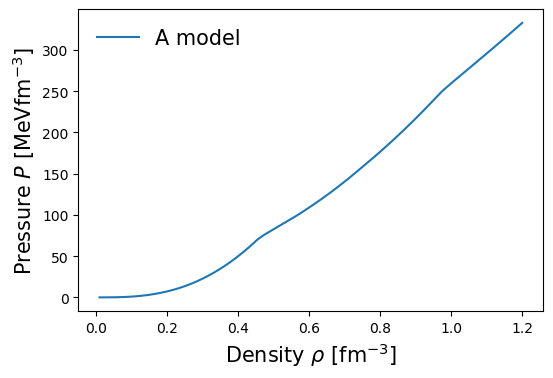

In [6]:
fig1= plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

ax1.plot(eos[:,0],eos[:,1],label=MODEL)

# Labels
ax1.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax1.set_ylabel(r"Pressure $P$ [MeVfm$^{-3}$]",fontsize=fs)

# Legend
ax1.legend(frameon=False, loc="upper left",fontsize=fs)

#### Pressure versus energy density

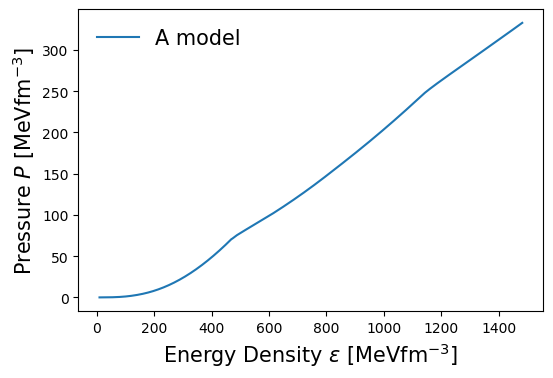

In [7]:
fig2= plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)

ax2.plot(eos[:,2],eos[:,1],label=MODEL)

# Labels
ax2.set_xlabel(r"Energy Density $\epsilon$ [MeVfm$^{-3}$]",fontsize=fs)
ax2.set_ylabel(r"Pressure $P$ [MeVfm$^{-3}$]",fontsize=fs)

# Legend
ax2.legend(frameon=False, loc="upper left",fontsize=fs)

#### Energy density versus density

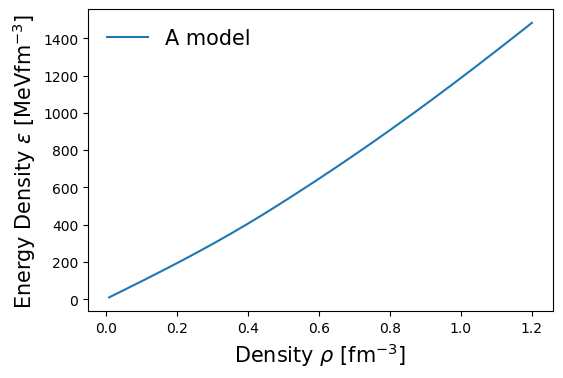

In [8]:
fig3= plt.figure(figsize=(6,4))
ax3 = fig3.add_subplot(111)

ax3.plot(eos[:,0],eos[:,2],label=MODEL)

# Labels
ax3.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax3.set_ylabel(r"Energy Density $\epsilon$ [MeVfm$^{-3}$]",fontsize=fs)

# Legend
ax3.legend(frameon=False, loc="upper left",fontsize=fs)

### Fock contributions to the energy density

In [9]:
en_den_fock = np.loadtxt(DATA_PATH+"beta_Fock.dat")
print(en_den_fock.shape)

(596, 5)


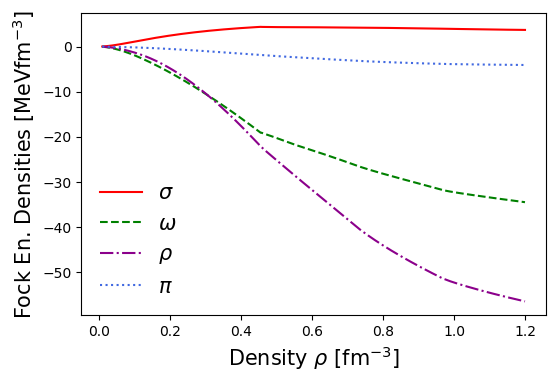

In [10]:
fig4= plt.figure(figsize=(6,4))
ax4 = fig4.add_subplot(111)

ax4.plot(en_den_fock[:,0],en_den_fock[:,1],'r-',label=r"$\sigma$")
ax4.plot(en_den_fock[:,0],en_den_fock[:,2],'g--',label=r"$\omega$")
ax4.plot(en_den_fock[:,0],en_den_fock[:,3],color='darkmagenta',linestyle='-.',label=r"$\rho$")
ax4.plot(en_den_fock[:,0],en_den_fock[:,4],color='royalblue',linestyle=":",label=r"$\pi$")

# Limits

# Labels
ax4.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax4.set_ylabel(r"Fock En. Densities [MeVfm$^{-3}$]",fontsize=fs)

# Legend
ax4.legend(frameon=False, loc="best",fontsize=fs)

### Species fractions

In [11]:
species_fraction = np.loadtxt(DATA_PATH+"beta_species_fraction.dat")
print(species_fraction.shape)

(596, 11)


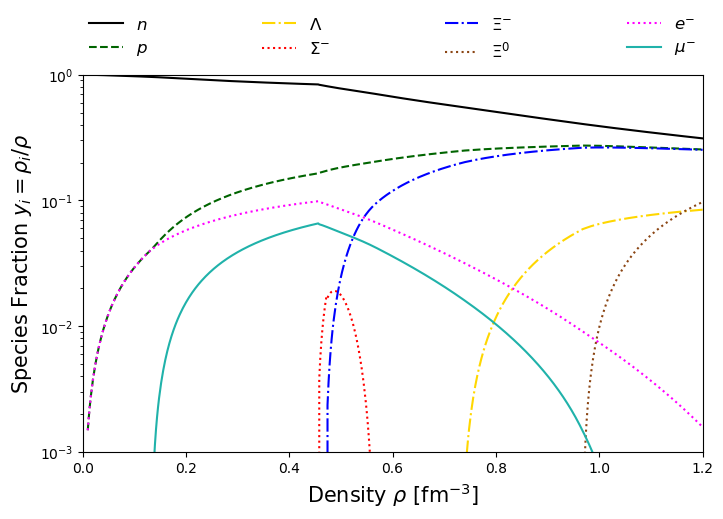

In [12]:
fig5= plt.figure(figsize=(8,5))
ax5 = fig5.add_subplot(111)

for i in range(1,11):
    # Check whether or not to plot a particular particle
    # Species fractions y_i are always y_i >= 0! If y_i > 0, then include it in the plot
    SUM = sum(species_fraction[:,i])
    if SUM>0:
        ax5.plot(species_fraction[:,0],species_fraction[:,i],
                 #label=particle_names[i-1],
                 label=particle_symbols[i-1],
                 color=particle_l_colours[i-1],
                 linestyle=particle_l_styles[i-1])
              

# Log scale y-axis 
ax5.set_yscale("log")

# Limits
ax5.set_xlim(0.,1.2)
ax5.set_ylim(10**(-3),1)

# Labels
ax5.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax5.set_ylabel(r"Species Fraction $y_{i} = \rho_{i}/\rho$",fontsize=fs)

#ax5.text(0.03,0.4,MODEL,fontsize=fs)

# Legend
ax5.legend(frameon=False,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0.,fontsize=fs-3)

# Save it
plt.savefig("beta_test1.png")

### Baryon chemical potentials

Baryon chemical potentials are all in different files!

In [13]:
# Neutral baryons
#================
#'nchem.dat'
nchem = np.loadtxt(DATA_PATH+"beta_n_chem.dat")
print('nchem:',nchem.shape)
#'lchem.dat'
lchem = np.loadtxt(DATA_PATH+"beta_l_chem.dat")
print('lchem:',lchem.shape)
#'s0chem.dat'
s0chem = np.loadtxt(DATA_PATH+"beta_s0_chem.dat")
print('s0chem:',s0chem.shape)
#'c0chem.dat'
c0chem = np.loadtxt(DATA_PATH+"beta_c0_chem.dat")
print('c0chem:',c0chem.shape)

# Negatively charged baryons
#===========================
#'smchem.dat'
smchem = np.loadtxt(DATA_PATH+"beta_sm_chem.dat")
print('smchem:',smchem.shape)
#'cmchem.dat'
cmchem = np.loadtxt(DATA_PATH+"beta_cm_chem.dat")
print('cmchem:',cmchem.shape)

# Positively charged baryons
#===========================
#'pchem.dat'
pchem = np.loadtxt(DATA_PATH+"beta_p_chem.dat")
print('pchem:',pchem.shape)
#'spchem.dat'
spchem = np.loadtxt(DATA_PATH+"beta_sp_chem.dat")
print('spchem:',spchem.shape)

nchem: (596, 2)
lchem: (596, 2)
s0chem: (596, 2)
c0chem: (596, 2)
smchem: (596, 2)
cmchem: (596, 2)
pchem: (596, 2)
spchem: (596, 2)


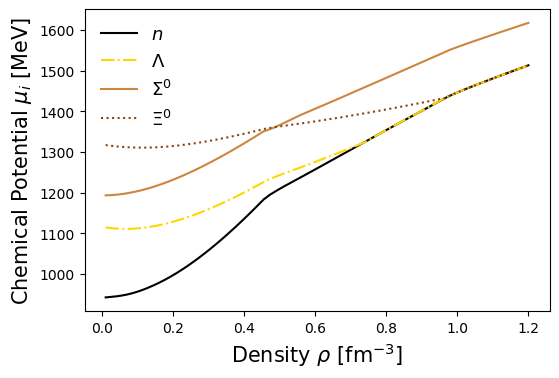

In [14]:
fig6= plt.figure(figsize=(6,4))
ax6 = fig6.add_subplot(111)

# Neutron
ax6.plot(nchem[:,0],nchem[:,1],
         particle_l_colours[particle_no["n"]],
         label=particle_symbols[particle_no["n"]],
         linestyle=particle_l_styles[particle_no["n"]])
# Lambda
ax6.plot(lchem[:,0],lchem[:,1],
         particle_l_colours[particle_no["l"]],
         label=particle_symbols[particle_no["l"]],
         linestyle=particle_l_styles[particle_no["l"]])
# Sigma 0
ax6.plot(s0chem[:,0],s0chem[:,1],
         particle_l_colours[particle_no["s0"]],
         label=particle_symbols[particle_no["s0"]],
         linestyle=particle_l_styles[particle_no["s0"]])
# Cascade 0
ax6.plot(c0chem[:,0],c0chem[:,1],
         particle_l_colours[particle_no["c0"]],
         label=particle_symbols[particle_no["c0"]],
         linestyle=particle_l_styles[particle_no["c0"]])

# Limits

# Labels
ax6.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax6.set_ylabel(r"Chemical Potential $\mu_{i}$ [MeV]",fontsize=fs)

# Legend
ax6.legend(frameon=False, loc="upper left",fontsize=fs-2)

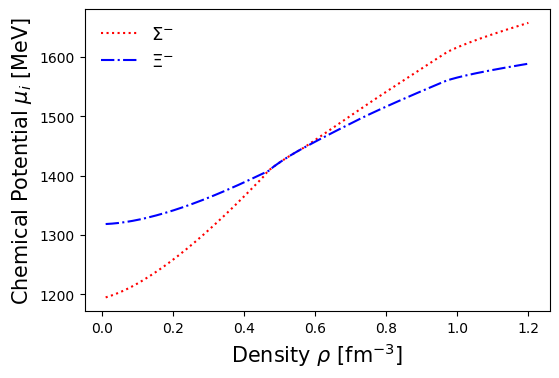

In [15]:
fig7= plt.figure(figsize=(6,4))
ax7 = fig7.add_subplot(111)

# Sigma -
ax7.plot(smchem[:,0],smchem[:,1],
         particle_l_colours[particle_no["sm"]],
         label=particle_symbols[particle_no["sm"]],
         linestyle=particle_l_styles[particle_no["sm"]])
# Cascade -
ax7.plot(cmchem[:,0],cmchem[:,1],
         particle_l_colours[particle_no["cm"]],
         label=particle_symbols[particle_no["cm"]],
         linestyle=particle_l_styles[particle_no["cm"]])

# Limits


# Labels
ax7.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax7.set_ylabel(r"Chemical Potential $\mu_{i}$ [MeV]",fontsize=fs)

# Legend
ax7.legend(frameon=False, loc="upper left",fontsize=fs-2)

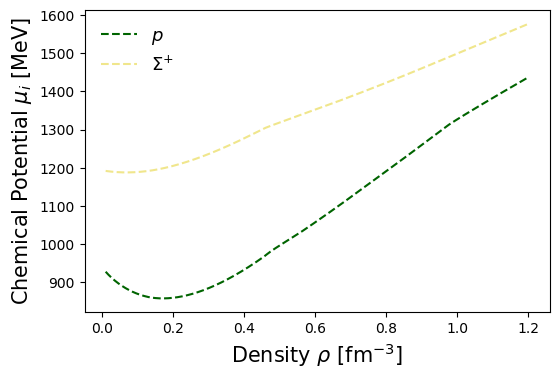

In [16]:
fig8= plt.figure(figsize=(6,4))
ax8 = fig8.add_subplot(111)

# Proton
ax8.plot(pchem[:,0],pchem[:,1],
         particle_l_colours[particle_no["p"]],
         label=particle_symbols[particle_no["p"]],
         linestyle=particle_l_styles[particle_no["p"]])

# Sigma +
ax8.plot(spchem[:,0],spchem[:,1],
         particle_l_colours[particle_no["sp"]],
         label=particle_symbols[particle_no["sp"]],
         linestyle=particle_l_styles[particle_no["sp"]])


# Limits


# Labels
ax8.set_xlabel(r"Density $\rho$ [fm$^{-3}$]",fontsize=fs)
ax8.set_ylabel(r"Chemical Potential $\mu_{i}$ [MeV]",fontsize=fs)

# Legend
ax8.legend(frameon=False, loc="upper left",fontsize=fs-2)